# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [1]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('local_path'))

## Fetching data using yfinance

In [2]:
ticker_symbol = "TSLA"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)




## Loading using dataloader

In [3]:
from backtrader.backtesting.backtester.backtester import Backtester

In [4]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        self.last_price = None

    def make_decision(self, data_point):
        current_price = data_point.close

        # if self.last_price is None:
        #     self.last_price = current_price
        #     return 0  # hold

        if current_price < self.last_price:
            decision = 1  # buy the whole portfolio
        elif current_price > self.last_price:
            decision = -1  # sell the whole portfolio
        else:
            decision = 0  # hold

        self.last_price = current_price
        return decision


In [5]:
from backtrader.backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
tester = SimpleBacktester(market_data)
results = tester.run_simulation()
print(results)

NameError: name 'Portfolio' is not defined

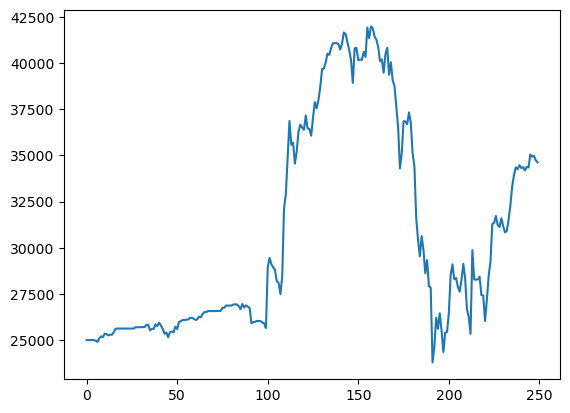

In [22]:
import matplotlib.pyplot as plt

plt.plot(results)